# MNIST-Digit-Recognizer-CNN-Keras
* **You can also view and contribute to the notebook below ->**
* **Github - [Digit-Recognizer-CNN](https://github.com/Chinmayrane16/MNIST-Digit-Recognizer-CNN-Keras-99.66)**
* **Do Star/Upvote if you like it :)**

## Topics
1. [**Exploring the Dataset**](#there_you_go_1)
> *  [1.1 Importing Libraries ](#there_you_go_1.1)
  * [1.2 Load dataset ](#there_you_go_1.2)
  * [1.3 Features ](#there_you_go_1.3)
  * [1.4 Examine Dimensions ](#there_you_go_1.4)
  * [1.5 Examine NaN values ](#there_you_go_1.5)
2. [**Visualizing the Dataset**](#there_you_go_2)
> * [2.1 Plotting Random Images ](#there_you_go_2.1)
  * [2.2 Distribution of Labels ](#there_you_go_2.2)
3. [**Data PreProcessing**](#there_you_go_3)
> * [3.1 Setting Random Seeds ](#there_you_go_3.1)
 * [3.2 Splitting Data ](#there_you_go_3.2)
 * [3.3 Reshaping Images ](#there_you_go_3.3)
 * [3.4 Data Augmentation ](#there_you_go_3.4)
 * [3.5 Normalization ](#there_you_go_3.5)
 * [3.6 One Hot Encoding ](#there_you_go_3.6)
4. [**Training ConvNet**](#there_you_go_4)
> * [4.1 Why CNN ? ](#there_you_go_4.1)
 * [4.2 Building a ConvNet ](#there_you_go_4.2)
 * [4.3 Compiling Model ](#there_you_go_4.3)
 * [4.4 Model Summary ](#there_you_go_4.4)
 * [4.5 Learning Rate Decay ](#there_you_go_4.5)
 * [4.6 Fitting the Model](#there_you_go_4.6)
5. [**Evaluating the Model**](#there_you_go_5)
> * [5.1 Plotting Train and Validation curves ](#there_you_go_5.1)
6. [**Plotting Confusion Matrix**](#there_you_go_6)
7. [**Generating CSV File**](#there_you_go_7)
8. [**Resources**](#there_you_go_8)

<a id="there_you_go_1"></a>
# 1) Exploring the Dataset

<a id="there_you_go_1.1"></a>
## 1.1) Importing Libraries

In [1]:
# Ignore warnings :
import warnings
warnings.filterwarnings('ignore')


# Handle table-like data and matrices :
import numpy as np
import pandas as pd
import math 
import itertools



# Modelling Algorithms :

# Classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis , QuadraticDiscriminantAnalysis

# Regression
from sklearn.linear_model import LinearRegression,Ridge,Lasso,RidgeCV, ElasticNet
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor,GradientBoostingRegressor,AdaBoostRegressor 
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor




# Modelling Helpers :
from sklearn.preprocessing import Imputer , Normalizer , scale
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.feature_selection import RFECV
from sklearn.model_selection import GridSearchCV , KFold , cross_val_score



#preprocessing :
from sklearn.preprocessing import MinMaxScaler , StandardScaler, Imputer, LabelEncoder



#evaluation metrics :

# Regression
from sklearn.metrics import mean_squared_log_error,mean_squared_error, r2_score,mean_absolute_error 

# Classification
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score  


# Deep Learning Libraries
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau, LearningRateScheduler
from keras.utils import to_categorical



# Visualisation
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
import missingno as msno



# Configure visualisations
%matplotlib inline
mpl.style.use( 'ggplot' )
plt.style.use('fivethirtyeight')
sns.set(context="notebook", palette="dark", style = 'whitegrid' , color_codes=True)
params = { 
    'axes.labelsize': "large",
    'xtick.labelsize': 'x-large',
    'legend.fontsize': 20,
    'figure.dpi': 150,
    'figure.figsize': [25, 7]
}
plt.rcParams.update(params)

Using TensorFlow backend.


In [2]:
# Center all plots
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""");

<a id="there_you_go_1.2"></a>
## 1.2) Load Dataset
* Specify the location to the Dataset and import them.

In [3]:
train = pd.read_csv('../input/train.csv')
test = pd.read_csv('../input/test.csv')
df = train.copy()
df_test = test.copy()

In [4]:
# How the Data looks
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<a id="there_you_go_1.3"></a>
## 1.3) Features
* **Label: ** The Target variable.
* **Pixels: ** The smallest unit of a Digital Image or Graphic that can be displayed on Digital Display Device.

Where humans can see the objects due to the Light Receptors in their Eyes which send Signals via the Optic Nerve to the Primary Visual Cortex, where the input is processed ,

Computers on the other hand, see the Image as 2-dimensional arrays of numbers, known as pixels. They Classify Images based on Boundaries and Curvatures of the Object (Represented by pixel values, either RGB or GrayScale) .

![](https://i.imgur.com/Rlh3FGT.png)

<a id="there_you_go_1.4"></a>
## 1.4) Examine Dimensions

In [5]:
print("Train: ", df.shape)
print("Test: ", df_test.shape)

Train:  (42000, 785)
Test:  (28000, 784)


* **So, there are 42000 Train Examples and 28000 Test Examples.**
* **Each image is 28 pixels in height and 28 pixels in width, with 784 pixels in total.**
> * Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. 
> * This pixel-value is an integer between 0 and 255, inclusive.
* **There is one extra column in Training sample called "Label" which is the Digit drawn by the user.**

In [6]:
df.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


<a id="there_you_go_1.5"></a>
## 1.5) Examine NaN Values

In [7]:
# Train
df.isnull().any().sum()

0

In [8]:
# Test
df_test.isnull().any().sum()

0

**So, there are No Null Values in Train and Test set.**

<a id="there_you_go_2"></a>
# 2) Visualizing The Dataset

<a id="there_you_go_2.1"></a>
## 2.1) Plotting Random Images

In [9]:
# Generate Random Numbers
rdm = np.random.randint(0,42000,size=4)
print(rdm)

[36867 31052 17826 31609]


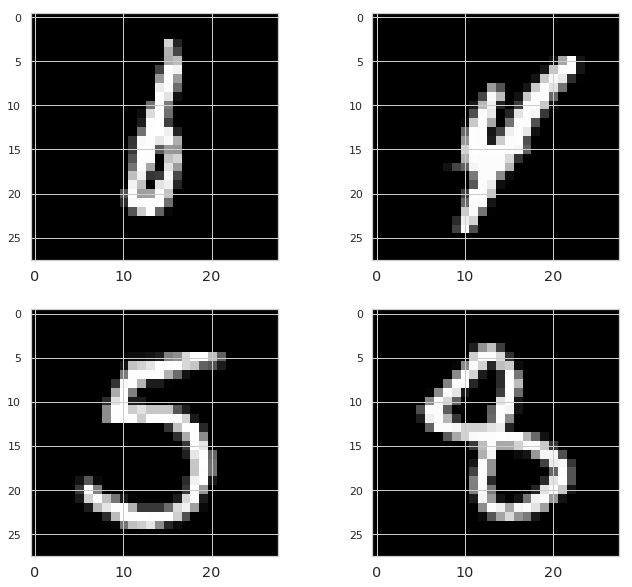

In [10]:
fig, ax = plt.subplots(2,2, figsize=(12,6))
fig.set_size_inches(10,10)
ax[0,0].imshow(df.drop('label',axis=1).values[rdm[0]].reshape(28,28),cmap='gray')
ax[0,1].imshow(df.drop('label',axis=1).values[rdm[1]].reshape(28,28),cmap='gray')
ax[1,0].imshow(df.drop('label',axis=1).values[rdm[2]].reshape(28,28),cmap='gray')
ax[1,1].imshow(df.drop('label',axis=1).values[rdm[3]].reshape(28,28),cmap='gray')

<a id="there_you_go_2.2"></a>
## 2.2) Distribution of Labels
**Let's look at the Distribution of labels to visualize if there are any Skewed Classes.**

In [11]:
df['label'].value_counts()

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

Text(0.5, 1.0, "Distribution of Label's")

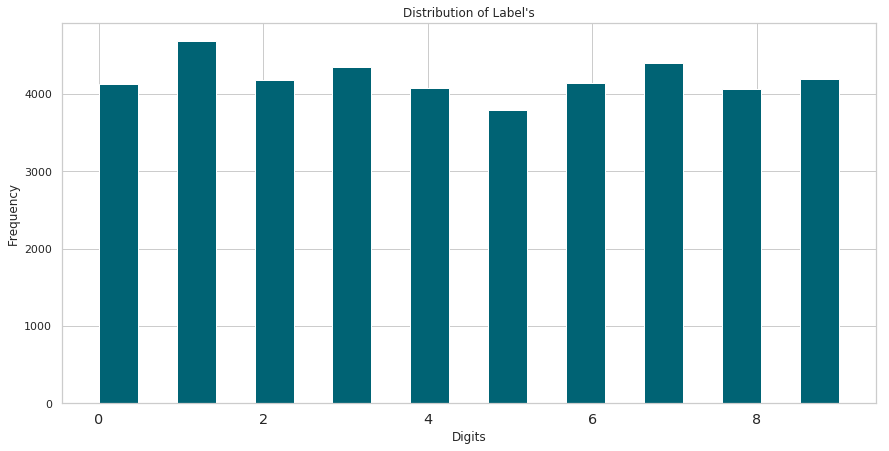

In [12]:
plt.figure(figsize=(13,7))
plt.hist( x=df['label'] , bins=19 ,color='c')
plt.xlabel('Digits')
plt.ylabel('Frequency')
plt.title('Distribution of Label\'s')

* **We can see that all the classes from 0-9 are distributed almost equally.**
* **So, there is no need for OverSampling or UnderSampling.**

<a id="there_you_go_3"></a>
# 3) Data Preprocessing

<a id="there_you_go_3.1"></a>
## 3.1) Setting the Random Seeds

In [13]:
## Setting the seeds for Reproducibility.
seed = 66
np.random.seed(seed)

<a id="there_you_go_3.2"></a>
## 3.2) Split Data into Train and Validation 
We split the data into a Training set and a Validation set, so that we can Evaluate the performance of our model.

In [14]:
X = train.iloc[:,1:]
Y = train.iloc[:,0]
x_train , x_test , y_train , y_test = train_test_split(X, Y , test_size=0.1, random_state=seed)

<a id="there_you_go_3.3"></a>
## 3.3) Reshape the Images
* Note that we have Images as 1D vector each containing 784 pixels. Before we feed the data to the CNN we must reshape the data into (28x28x1) 3D matrices.
* This is because Keras wants an Extra Dimension in the end, for channels. If this had been RGB images, there would have been 3 channels, but as MNIST is gray scale it only uses one.

In [15]:
# The first parameter in reshape indicates the number of examples.
# We pass it as -1, which means that it is an unknown dimension and we want numpy to figure it out.

# reshape(examples, height, width, channels)
x_train = x_train.values.reshape(-1, 28, 28, 1)
x_test = x_test.values.reshape(-1, 28, 28, 1)
df_test=df_test.values.reshape(-1,28,28,1)

<a id="there_you_go_3.4"></a>
## 3.4) Data Augmentation
Data Augmentation simply means increasing the number of Data points. in terms of Images it means the increasing number of images in the Dataset.

In order to avoid the overfitting problem, we need expand the dataset. This can be acheived by Rotating the Image, Flipping the Image, Zooming the Image, Changing light conditions, Cropping it etc.  The more the data, the better our models would perform.

A CNN that can robustly classify objects even if its placed in different orientations is said to have the property called Invariance. In the real world scenario, we may have a dataset of images taken in a limited set of conditions. But, our target application may exist in a variety of conditions, such as different orientation, location, scale, brightness etc. We account for these situations by training our neural network with additional synthetically modified data.

[Click here to read more about Data Augmentation.](https://medium.com/nanonets/how-to-use-deep-learning-when-you-have-limited-data-part-2-data-augmentation-c26971dc8ced)

In [16]:

datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images

<a id="there_you_go_3.5"></a>
## 3.5) Normalization

The Pixel Values are often stored as __*Integer*__ Numbers in the range 0 to 255, the range that a single 8-bit byte can offer.

In [17]:
df.dtypes.head()

label     int64
pixel0    int64
pixel1    int64
pixel2    int64
pixel3    int64
dtype: object

1. Normalization is performed on the Dataset to Scale the values within a Range. [0,1]
2. This helps Gradient Descent to Converge much faster.
3. Normalization is important to bring all the features to equal level and give all of them equal weigthage.
4. Normalization helps remove distortions caused by Light and Shadows in an Image.


5. Normalization is carried out as follows:

> x = (x - min) / (max - min)  ;  Here min=0 and max=255

In [18]:
# You need to make sure that your Image is cast into double/float from int before you do this scaling 
# as you will most likely generate floating point numbers.
# And had it been int, the values will be truncated to zero.

x_train = x_train.astype("float32")/255
x_test = x_test.astype("float32")/255
df_test = df_test.astype("float32")/255

In [19]:
datagen.fit(x_train)

<a id="there_you_go_3.6"></a>
## 3.6) One Hot Encoding
The labels are given as integers between 0-9. We need to one hot encode them , Eg 4 [0, 0, 0, 1, 0, 0, 0, 0, 0, 0] . 

This is done so that we have labels for all the classes, and we can easily carry out the Error/Cost during BackPropogation.

We have 10 digits [0-9] or classes, therefore we one-hot-encode the target variable with 10 classes

In [20]:
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

print(y_train[0])

[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


<a id="there_you_go_4"></a>
# 4) Training Convolutional Neural Network

<a id="there_you_go_4.1"></a>
## 4.1) Why CNN?
* **Because when it comes to Image Recognition, then CNN's are the best.**

* **It became successful in the late 90's after Yann LeCun used it on MNIST and acheived 99.5% accuracy.**

* **You can try other Models like Support Vector Machines, K-Nearest Neighbour, Random Forest but the accuracy acheived is 96-97%, which is not that good.**

* **The Biggest Challenge is picking the Right model by understanding the Data rather than Tuning parameters of other models.**

* **And the last point, A large Training data really helps in improving Neural Networks Accuracy.**

### Convolution Operation
![Imgur](https://i.imgur.com/LMmTCdJ.gif)

<a id="there_you_go_4.2"></a>
## 4.2) Building a ConvNet

![](https://i.imgur.com/PJTTKtB.jpg)

**Steps:**

1) At First, we use **Sequential Keras API** which is just a linear stack of layers. We add one layer at a time starting from input.

2) Next We add **Convolutional Layers**, which are the Building blocks of ConvNets. Convolutional Layers has set of Independent Filters whose depth is equal to Input and other dimensions can be set manually. These Filters when convolved over the Input Image produce *Feature Maps*. 

It includes some HyperParameters such as **The number of filters, Dimensions of Filter (F), Stride (S), Padding(P) , Activation Function etc. which we input manually. Let the Input Volume Size be deonted by (W) ,**

**Then, the Output will have Dimensions given by -->**

**(Height, Width) = ( ( W − F + 2P ) / S ) + 1 **

And the Depth will be equal to Number of Filters Specified.

3) Next We add **Pooling Layers**, which are used for Dimensionality Reduction or DownSampling the Input. These are used where we have lot of Input Features. It reduces the amount of Parameters and Computational power required drastically, thus reducing Overfitting. These along with Convolutional layers are able to learn more Complex features of the Image.

4) We add **Batch Normalization** where we acheive Zero mean and Variance one. It scales down outliers and forces the network to learn features in a distributed way, not relying too much on a Particular Weight and makes the model better Generalize the Images.

5) To avoid Overfitting We add **Dropout**. This randomly drops some percentage of neurons, and thus the weights gets Re-Aligned. The remaining Neurons learn more features and this reduces the dependency on any one Neuron. DropOut is a Regularization Technique, which Penalizes the Parameters. Generally we set the DropOutRate between 0.2-0.5 .

6) Finally we add **Flatten layer** to map the input to a 1D vector. We then add Fully connected Layers after some convolutional/pooling layers. It combines all the Features of the Previous Layers.

7) Lastly, we add the **Output Layer**. It has units equal to the number of classes to be identified. Here, we use 'sigmoid' function if it is Binary Classification otherwise 'softmax' activation function in case of Multi-Class Classification.

In [21]:
# Building ConvNet

model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', strides=1, padding='same', data_format='channels_last',
                 input_shape=(28,28,1)))
model.add(BatchNormalization())
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', strides=1, padding='same', data_format='channels_last'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid' ))
model.add(Dropout(0.25))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', strides=1, padding='same', data_format='channels_last'))
model.add(BatchNormalization())
model.add(Conv2D(filters=64, kernel_size=(3, 3), strides=1, padding='same', activation='relu', data_format='channels_last'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), padding='valid', strides=2))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Dense(1024, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

<a id="there_you_go_4.3"></a>
## 4.3) Compiling the Model
1) Before Training the model, we need to configure the Learning process, which is done via the compile method in Keras.

2) We need to specify the Optimizer. Optimization Algorithms help us minimize the Error Function. The internal parameters of a Model play a very important role in efficiently and effectively training a Model and produce accurate results. This is why we use various Optimization strategies and algorithms to update and calculate appropriate and optimum values of such model’s parameters 

There are a lot of Optimization Algos available, You can use RMSprop, Adam, AdaGrad, AdaDelta etc. I have used Adam (Adaptive Moment Estimation) here as it converges very fast and the learning speed of the Model is quiet Fast and efficient and also it rectifies every problem that is faced in other optimization techniques such as vanishing Learning rate , slow convergence or High variance in the parameter updates which leads to fluctuating Loss function.

3) Next we Specify Loss Function. For Binary Classification we use "binary_crossentropy" and for Multi-class Classification we use "categorical_crossentropy".

4) Atlast we specify the metrics to Evaluate the model performance.

In [22]:
# Optimizer
optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999 )

In [23]:
# Compiling the model
model.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"])

<a id="there_you_go_4.4"></a>
## 4.4) Model Summary
**Prints the summary representation of your model.**

In [24]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 28, 32)        128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
batch_normalization_2 (Batch (None, 28, 28, 32)        128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 64)        18496     
__________

<a id="there_you_go_4.5"></a>
## 4.5) Learning Rate Decay
* Learning Rate plays a vital role in minimizing the Cost Function. Learning Rate is a Descent step which the Optimizing Algorithms take in order to Converge to a local optimum. 
* The Learning rate should be properly tuned , such that it is not too high to take very large steps, neither it should be too small , which would not alter the Weights and Biases.
* Many Optimization Algorithms have a constant Learning Rate, which many a times do not converge to local optimum, and therefore we need to use Learning Rate such that it starts with a good learning rate and eventually reduces in oder to reach downhill.

* To implement Learning Rate Decay, we can use either **LearningRateScheduler** or **ReduceLRonPlateau**.
* **LearningRateScheduler** takes the step decay function as argument and return the updated learning rates for use in optimzer at every epoch stage.
* **ReduceLRonPlateau** monitors a quantity and if no improvement is seen for a 'patience' number of epochs, then the learning rate is reduced by a factor specified manually.

![](https://i.imgur.com/4m7Zw1T.png)

In [25]:
reduce_lr = LearningRateScheduler(lambda x: 1e-3 * 0.9 ** x)

<a id="there_you_go_4.6"></a>
## 4.6) Fitting the model

In [26]:
batch_size = 64
epochs = 20

In [27]:
# Fit the Model
history = model.fit_generator(datagen.flow(x_train, y_train, batch_size = batch_size), epochs = epochs, 
                              validation_data = (x_test, y_test), verbose=2, 
                              steps_per_epoch=x_train.shape[0] // batch_size,
                              callbacks = [reduce_lr])

Epoch 1/20
 - 22s - loss: 0.3842 - acc: 0.8892 - val_loss: 0.0831 - val_acc: 0.9745
Epoch 2/20
 - 17s - loss: 0.1279 - acc: 0.9603 - val_loss: 0.0605 - val_acc: 0.9821
Epoch 3/20
 - 18s - loss: 0.0996 - acc: 0.9702 - val_loss: 0.0413 - val_acc: 0.9902
Epoch 4/20
 - 18s - loss: 0.0778 - acc: 0.9767 - val_loss: 0.0419 - val_acc: 0.9881
Epoch 5/20
 - 17s - loss: 0.0662 - acc: 0.9802 - val_loss: 0.0489 - val_acc: 0.9862
Epoch 6/20
 - 17s - loss: 0.0619 - acc: 0.9813 - val_loss: 0.0316 - val_acc: 0.9907
Epoch 7/20
 - 19s - loss: 0.0566 - acc: 0.9825 - val_loss: 0.0387 - val_acc: 0.9895
Epoch 8/20
 - 17s - loss: 0.0531 - acc: 0.9846 - val_loss: 0.0278 - val_acc: 0.9921
Epoch 9/20
 - 17s - loss: 0.0463 - acc: 0.9853 - val_loss: 0.0356 - val_acc: 0.9910
Epoch 10/20
 - 18s - loss: 0.0421 - acc: 0.9862 - val_loss: 0.0249 - val_acc: 0.9952
Epoch 11/20
 - 18s - loss: 0.0401 - acc: 0.9874 - val_loss: 0.0265 - val_acc: 0.9931
Epoch 12/20
 - 18s - loss: 0.0329 - acc: 0.9892 - val_loss: 0.0327 - val_a

<a id="there_you_go_5"></a>
# 5) Evaluating the Model

<a id="there_you_go_5.1"></a>
## 5.1) Plotting the Train and Validation Curves
Let's plot "Accuracy as a function of number of Epochs" and also "Loss as a function of number of Epochs".

In [28]:
model.evaluate(x_test, y_test)

4200/4200 [==============================] - 0s 93us/step


[0.021024468635826323, 0.9945238095238095]

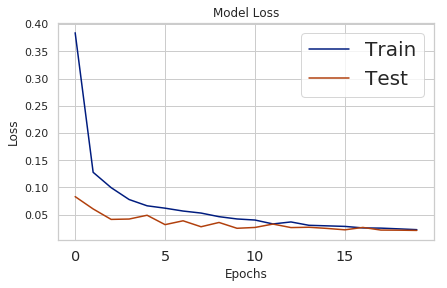

In [29]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Model Loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'])
plt.show()

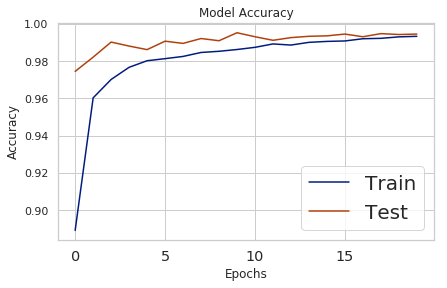

In [30]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train','Test'])
plt.show()

**We can clearly see that the Validation Accuracy and Training Accuracy are close enough. This concludes that our model is not Overfitting the Data.**

<a id="there_you_go_6"></a>
# 6) Confusion Matrix
Let's view the the Performance of our classification model on the data using Confusion Matrix.

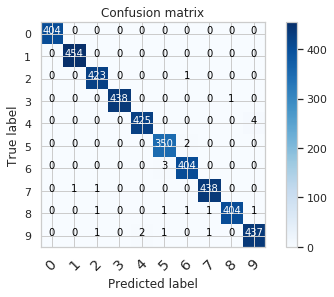

In [31]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Predict the values from the validation dataset
Y_pred = model.predict(x_test)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_test,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(10))

**Our model did pretty good job in classifying the Images. But it seems that it got confused and misclassified digit 4 as 9.**

<a id="there_you_go_7"></a>
# 7) Generating CSV File

In [32]:
pred_digits_test=np.argmax(model.predict(df_test),axis=1)
image_id_test=[]
for i in range (len(pred_digits_test)):
    image_id_test.append(i+1)
d={'ImageId':image_id_test,'Label':pred_digits_test}
answer=pd.DataFrame(d)
answer.to_csv('answer.csv',index=False)

<a id="there_you_go_8"></a>
# 8) Resources

1. Deep Learning ([Blog](https://medium.com/intro-to-artificial-intelligence/deep-learning-series-1-intro-to-deep-learning-abb1780ee20)) ([Video](https://www.youtube.com/watch?v=6M5VXKLf4D4&ab_channel=Simplilearn))
2. Neural Network ([Blog](https://medium.com/@purnasaigudikandula/a-beginner-intro-to-neural-networks-543267bda3c8)) ([Video](https://www.youtube.com/watch?v=aircAruvnKk&ab_channel=3Blue1Brown))
3. Convolutions Explained ([Blog 1](https://towardsdatascience.com/intuitively-understanding-convolutions-for-deep-learning-1f6f42faee1)) ([Blog 2](https://towardsdatascience.com/building-a-convolutional-neural-network-cnn-in-keras-329fbbadc5f5)) ([Blog 3](https://cs231n.github.io/convolutional-networks/)) ([Blog 4](https://adeshpande3.github.io/A-Beginner%27s-Guide-To-Understanding-Convolutional-Neural-Networks/)) ([Blog 5](https://adeshpande3.github.io/adeshpande3.github.io/A-Beginner's-Guide-To-Understanding-Convolutional-Neural-Networks-Part-2/)) ([Video](https://www.youtube.com/watch?v=YRhxdVk_sIs&ab_channel=deeplizard))
4. Data Augmentation ([Blog](https://medium.com/nanonets/how-to-use-deep-learning-when-you-have-limited-data-part-2-data-augmentation-c26971dc8ced)) ([Video](https://www.youtube.com/watch?v=14syUbL16k4&ab_channel=deeplizard))

Complete Deep Learning Specialization ([Coursera](https://www.coursera.org/specializations/deep-learning))